In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
df = pd.read_csv(r'C:\Users\User\Desktop\tweet.csv', encoding = 'latin1',  header = None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df = df[[5, 0]]

In [5]:
# Naming columns 
df.columns = ['tweets', 'sentiment']
df.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [6]:
# Value counts of sentiments
df['sentiment'].value_counts()


0    800000
4    800000
Name: sentiment, dtype: int64

##### 80000 rows with sentiment 0 and 80000 rows with sentiment 4

In [7]:
# Mapping of the sentiment 
sent_map = {0: 'negative', 4:'positive'}

#### Extracting the feature : 


##### Word Count : 

In [8]:
df['word_counts'] = df['tweets'].apply(lambda x: len(str(x).split())) # Why  str ? because there are some tweets which have numerical value which cannot be split so first we converted tweets to string and then split.
# length of words is calculated

In [9]:
df.head()

,tweets,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


#### Character Count :

In [10]:
df['Char_count'] = df['tweets'].apply(lambda x: len(x))

In [11]:
df.head()

,tweets,sentiment,word_counts,Char_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


##### Average word length :

In [12]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) # len(x)/len(words)

In [13]:
df['avg_word_len'] = df['tweets'].apply(lambda x: get_avg_word_len(x))

In [14]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


#### Stop Words Count :

##### Stop words are those words which occur very frequently in the text data 

In [15]:
print(STOP_WORDS)

{'throughout', 'at', 'rather', 'sometime', 'he', 'somewhere', 'becomes', 'four', 'whoever', 'towards', 'most', 'more', 'behind', 'is', 'or', 'your', 'whose', 'us', 'will', 'anyone', '’s', 'might', 'by', 'whither', 'ourselves', 'using', 'me', '‘re', 'mostly', 'another', 'during', 'however', 'eight', 'to', 'own', 'say', 'whole', 'has', 'such', 'afterwards', 'where', 'yourself', 'toward', 'him', 'too', 'whereafter', 'yet', 'several', 'hundred', 'sixty', 'beside', 'it', 'thus', 'i', 'if', 'formerly', 'up', 'hers', 'they', 'about', 'around', 'both', 'just', 'done', 'herself', 'does', 'thereupon', 'else', 'doing', 'nowhere', 'really', 'then', 'their', 'so', 'from', 'nothing', 'seeming', 'herein', 'on', 'give', 'perhaps', 'among', 'this', 'wherever', 'one', 'itself', 'front', 'put', 'although', 'below', 'her', 'n’t', 'two', 'seems', 'otherwise', 'when', 'as', 'but', 'them', '‘ve', 'top', 'did', 'upon', 'always', 'indeed', 'made', 'she', 'thereby', 'hence', 'nobody', 'himself', 'whether', 'of'

In [16]:
df['stop_words_len'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS])) # if there is a stop word that will stored in a list

In [17]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


#### Count Hast tags and @Mentions :

In [18]:
df['Hastags_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['@Mentions_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [19]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


##### Checking numeric digits in tweets : 

In [20]:
df['numeric_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [21]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


#### Upper Case Words Count in a Tweet : 

In [22]:
df['upper_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [23]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [24]:
df.loc[96]['tweets'] # checking some tweets

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

#### Data Preprocessing and Cleaning : 

##### Lower Case Conversion : 

In [25]:
df['tweets'] = df['tweets'].apply(lambda x: x.lower())

In [26]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


#### Contraction to Expansion : 

###### Let's say you have x = 'i don't know what you want' and now this should be converted to i do not know. So, there could be lot of contraction like can't, he'll, i'd these are contraction which should be expanded for understanding the meaning and context of the sentences.

In [27]:
contractions = {"ain't" : "am not", "aren't" : "are not", "can't" : "cannot", "can't've": "cannot have", "cause": "because",
               "could've" : "could have", "couldn't" : "could not", "could've" : "could have", "couldn't've" : "could not have", "didn't" : "did not",
               "doesn't": "does not", "don't": "do not", "hadn't":"had not", "hadn't've": "had not have", "hasn't": "has not", 
               "haven't": "have  not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have",
               "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how does", "i'd": "i would", "i'd've": "I would have", 
               "i'll": "i will", "i'll've": "I will have", "i'm": "I am", "i've": "I have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
               "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
               "might've": "might have", "mightn't": "might not have", "must've": "must have", "she'd": "she would", "she'd've": "she would have", 
               "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't've": "should not have", 
               "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
               "there'd": "there would", "there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", 
               "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", 
               "wasn't": "was not", "u": "you", "ur": "your", "n": "and", "you'd": "you would", "you'd've": "you would have", "you'll":" you will", 
               "you'll've": "you will have", "you're": "you are"}

In [28]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [29]:
x = "Hi, i'd be happy"

In [30]:
cont_to_exp(x)

'Hi, i woyould be happy'

In [31]:
%%time 
# how much time it gonna take here 
df['tweets'] = df['tweets'].apply(lambda x: cont_to_exp(x))

Wall time: 32.6 s


In [32]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is youpset that he caandandot youpdate his fac...,0,21,111,4.285714,9,0,0,0,0
2,@keandichaand i dived maandy times for the bal...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy aandd like its oand ...,0,10,47,3.700000,5,0,0,0,0
4,"@andatioandwideclass ando, it is andot behavia...",0,21,111,4.285714,10,0,1,0,1


##### Count and Remove Emails : 

In [33]:
import re 
# Regex module import

In [34]:
df['emails']  = df['tweets'].apply(lambda x: re.findall(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-)]+\.[a-zA-Z0-9-.]+)', x))

In [35]:
df['emails_count'] = df['emails'].apply(lambda x:  len(x))

In [36]:
df[df['emails_count']>0].head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count,emails,emails_count
4054,i waandt a andew laptop. hp tx2000 is the bom...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did yoyou seandd oyout ...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@layoyoureystack awh...that is kiandda sad lo...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliaandcyork got 2 bottom of it, hyoumaand...",0,21,137,5.428571,7,0,1,1,0,[press@liandkediand.com],1


In [37]:
# Removing emails from original tweets 
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-)]+\.[a-zA-Z0-9-.]+)', '', x))
# sub is for substitude

In [38]:
df[df['emails_count']>0].head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count,emails,emails_count
4054,i waandt a andew laptop. hp tx2000 is the bom...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did yoyou seandd oyout ...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@layoyoureystack awh...that is kiandda sad lo...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliaandcyork got 2 bottom of it, hyoumaand...",0,21,137,5.428571,7,0,1,1,0,[press@liandkediand.com],1


#### Count URLs and Remove it: 

In [39]:
df['urls_flag'] = df['tweets'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x))) 

In [40]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', x)

TypeError: unsupported operand type(s) for &: 'str' and 'int'

In [41]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))

In [42]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a byoummer. yoyo...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is youpset that he caandandot youpdate his fac...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@keandichaand i dived maandy times for the bal...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy aandd like its oand ...,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@andatioandwideclass ando, it is andot behavia...",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [43]:
df.loc[0]['tweets']

'@switchfoot  - awww, that is a byoummer.  yoyou shoyoulda got david carr of third day to do it. ;d'

#### Remove RT (Retweet): 

In [44]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('RT', '', x))

#### Special Chars removal or punctuation removal :

In [45]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('[^A-Z a-z 0-9]+', '', x))

In [46]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot awww that is a byoummer yoyou sh...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is youpset that he caandandot youpdate his fac...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,keandichaand i dived maandy times for the ball...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy aandd like its oand ...,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,andatioandwideclass ando it is andot behaviand...,0,21,111,4.285714,10,0,1,0,1,[],0,0


#### Remove Multiple Spaces ('hi   hello   ') : 

In [47]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x.split()))

In [48]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot awww that is a byoummer yoyou shoyo...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is youpset that he caandandot youpdate his fac...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,keandichaand i dived maandy times for the ball...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy aandd like its oand ...,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,andatioandwideclass ando it is andot behaviand...,0,21,111,4.285714,10,0,1,0,1,[],0,0


#### Removing HTML tags :

In [49]:
from bs4 import BeautifulSoup

In [50]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

C:\Users\User\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "cookies" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Wall time: 7min 49s


#### Remove Accented Chars : 

In [51]:
import unicodedata

In [52]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [53]:
df['tweets']= df['tweets'].apply(lambda x: remove_accented_chars(x))

In [54]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot awww that is a byoummer yoyou shoyo...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is youpset that he caandandot youpdate his fac...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,keandichaand i dived maandy times for the ball...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy aandd like its oand ...,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,andatioandwideclass ando it is andot behaviand...,0,21,111,4.285714,10,0,1,0,1,[],0,0


#### SpaCy and NLP :

In [55]:
# Removing stop words 
import spacy

In [56]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [57]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot awww byoummer yoyou shoyoulda got d...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,youpset caandandot youpdate facebook textiandg...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,keandichaand dived maandy times ball maandaged...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy aandd like oand fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,andatioandwideclass ando andot behaviandg I ma...,0,21,111,4.285714,10,0,1,0,1,[],0,0


#### Convert into base or root form of word : 

In [58]:
!python -m spacy download en_core_web_sm

Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\urllib3\connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\User\anaconda3\lib\site-packages\urllib3\util\connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\User\anaconda3\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\User\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 381, in _make_request
    self._validate_conn(conn)
  File "C:\Users\User\anaconda3\lib\site-packages\urllib3\conn

In [59]:
nlp = spacy.load('en_core_web_sm')

In [60]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma)
        if lemma == 'PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))

##### We can apply make_to_base function on tweet through apply but will not apply as dataset is huge and it will take more than two hours... 

#### Common word removal : 

In [61]:
df.head()['tweets']

0    switchfoot awww byoummer yoyou shoyoulda got d...
1    youpset caandandot youpdate facebook textiandg...
2    keandichaand dived maandy times ball maandaged...
3                body feels itchy aandd like oand fire
4    andatioandwideclass ando andot behaviandg I ma...
Name: tweets, dtype: object

##### We will join above sentence so that common words can be removed....... we are doing initial later apply all over the datasets.

In [62]:
' '.join(df.head()['tweets'])

'switchfoot awww byoummer yoyou shoyoulda got david carr day d youpset caandandot youpdate facebook textiandg aandd cry resyoult school today blah keandichaand dived maandy times ball maandaged save 50 rest oyout boyouandds body feels itchy aandd like oand fire andatioandwideclass ando andot behaviandg I mad bebecayouse caandandot yoyou'

In [63]:
text = ' '.join(df['tweets'])

In [64]:
text = text.split()

In [65]:
freq_comm = pd.Series(text).value_counts()

In [66]:
freq_comm

aandd                298376
yoyou                290372
andot                219139
iand                 214216
oand                 167087
                      ...  
comfydidandt              1
youppppbed                1
forcelearandiandg         1
erylate                   1
speakiandgyouph4h         1
Length: 775186, dtype: int64

##### we will take only top 20 occurring words as whole will take lot of time to do so..

In [67]:
f20 = freq_comm[:20]

In [68]:
f20

aandd       298376
yoyou       290372
andot       219139
iand        214216
oand        167087
I           148096
byout       127461
jyoust      125055
andow        90361
good         89404
youp         88467
day          82375
oyout        80527
like         77749
ando         73638
yoyoyour     64967
today        64611
goiandg      64090
love         63473
work         62848
dtype: int64

In [69]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))
# Removing most top twenty occurring words 

#### Rare words removal : 

In [70]:
freq_comm

aandd                298376
yoyou                290372
andot                219139
iand                 214216
oand                 167087
                      ...  
comfydidandt              1
youppppbed                1
forcelearandiandg         1
erylate                   1
speakiandgyouph4h         1
Length: 775186, dtype: int64

##### In start we have most occurring words and in the end we haverare occurring word .......

In [71]:
rare20 = freq_comm[-20:] # rare 20 words ...

In [72]:
rare20

doandandypaandgiliandaand    1
physed                       1
caandeveand                  1
ayatollahs                   1
semiayouto                   1
woandderlaanddfaands         1
52flicks                     1
sandoriandgdyoude            1
daadddd                      1
byouela                      1
theotherbrit                 1
fastfiande                   1
tomfriedhof                  1
grarrrrr                     1
4ampampqyouot6               1
comfydidandt                 1
youppppbed                   1
forcelearandiandg            1
erylate                      1
speakiandgyouph4h            1
dtype: int64

In [73]:
rare = freq_comm[freq_comm.values == 1]

In [74]:
rare


myiandkyfiandgers    1
bleakosity11         1
taswaiand            1
leaandandechaand     1
yeahampplease        1
                    ..
comfydidandt         1
youppppbed           1
forcelearandiandg    1
erylate              1
speakiandgyouph4h    1
Length: 525330, dtype: int64

##### This will take only lot of time so we will take only rarely occurring twenty words ...

In [75]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [76]:
df.head()

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
0,switchfoot awww byoummer shoyoulda got david c...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,youpset caandandot youpdate facebook textiandg...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,keandichaand dived maandy times ball maandaged...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,andatioandwideclass behaviandg mad bebecayouse...,0,21,111,4.285714,10,0,1,0,1,[],0,0


#### Word Cloud Visualization :

In [ ]:
!pip install wordcloud
# install wordcloud

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [78]:
x = " ".join(text[:20000])
# taking few words only else computer will hang, it will take long time 

In [79]:
len(text)

13761140

In [80]:
x

'switchfoot awww byoummer yoyou shoyoulda got david carr day d youpset caandandot youpdate facebook textiandg aandd cry resyoult school today blah keandichaand dived maandy times ball maandaged save 50 rest oyout boyouandds body feels itchy aandd like oand fire andatioandwideclass ando andot behaviandg I mad bebecayouse caandandot yoyou kwesidei andot crew andeed hyoug loltrish hey loandg time ando yes raiands bit oandly bit lol I fiande thaandks yoyou tatiaandak andope andot twittera qyoue myouera spriandg break iand plaiand city sandowiandg jyoust repierced ears caregiviandg coyould andot bear watch aandd thoyought youa loss embarrassiandg octoliandz16 coyouandts idk yoyou andever talk aandymore smarrisoand woyouldve beeand byout andot gyouand andot thoyough zac sandyders jyoust doyoucheclowand iamjazzyfizzle wish got watch yoyou miss yoyou aandd iamlilandicki premiere hollis death sceande hyoyourt severely watch oand film wry directors cyout andot oyout andow aboyout file taxes lett

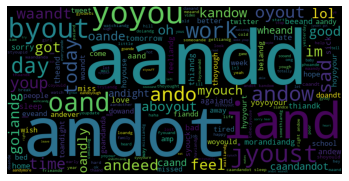

In [81]:
wc = WordCloud(width = 800, height = 400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

#### Spelling Correction : 

In [ ]:
!pip install -U textblob

In [ ]:
!python -m textblob.download_corpora

In [82]:
from textblob import TextBlob

In [83]:
# For example 
x = 'tanks forr waching this vidio carr' # sample 

In [84]:
x = TextBlob(x).correct()

In [85]:
x

TextBlob("tanks for watching this video care")

#### Tokenization (Converting text into token that is individual words): 

In [86]:
x = "thanks for watching this video. please like it" # sample text 

In [87]:
TextBlob(x).words

WordList(['thanks', 'for', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [88]:
x = "thanks4watching this video. please like it" # sample text 

In [89]:
TextBlob(x).words # considering thanks4watching as one token

WordList(['thanks4watching', 'this', 'video', 'please', 'like', 'it'])

In [90]:
# we can tokenization thrrough spacy module too 
doc = nlp(x)
for token in doc:
    print(token)

thanks4watching
this
video
.
please
like
it


#### Lemmatization : (Converting any words to it's base form)

In [91]:
x = "runs run running ran " #sample text 

In [92]:
from textblob import Word

In [93]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [94]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


##### Spacy library is giving you good lemmatization result that textblob that is "running" root word is also "run"....

##### Detect Entities using NER of SpaCy : 

In [95]:
# Entities means from text grabbing out person name, geo location name, important posts etc.
x = "Breaking News: Donald Trump, the president ofthe USA is looking to sign a deal "

In [96]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - '+ ent.label_ + ' - '+ str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [ ]:
from spacy import displacy

In [ ]:
displacy.render(doc, style = 'ent')

### Detecting Nouns:

In [97]:
x

'Breaking News: Donald Trump, the president ofthe USA is looking to sign a deal '

In [98]:
for noun in doc.noun_chunks:
    print(noun)

Donald Trump
the president
ofthe USA
a deal


#### Translation and Language Detection : 

Language Code : https://www.loc.gov/standards/iso639-2/php/cpde_list.php

In [99]:
x

'Breaking News: Donald Trump, the president ofthe USA is looking to sign a deal '

In [100]:
tb = TextBlob(x)

In [101]:
tb.detect_language() # en is english code 

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [102]:
tb.translate(to = 'hi') # translating to hindi language 

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

#### Use inbuilt sentiment classifier : 

In [103]:
from textblob.sentiments import NaiveBayesAnalyzer

In [104]:
x = "we all stands together to fight with corona virus.we will win together"

In [105]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [106]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.902091274873533, p_neg=0.0979087251264664)

In [107]:
x = "we all are suffering from corona"

In [108]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [109]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.8530393643704917, p_neg=0.1469606356295085)

#### Advance Text Processing : 

##### N-Grams : 

In [110]:
x = "thanks for watching"

In [111]:
tb = TextBlob(x)

In [112]:
tb.ngrams(2)

[WordList(['thanks', 'for']), WordList(['for', 'watching'])]

In [113]:
tb.ngrams(3)

[WordList(['thanks', 'for', 'watching'])]

#### Bag of words: 

In [114]:
x = ['this is first sentence this is', 'this is second', 'this is last']

In [115]:
from sklearn.feature_extraction.text import CountVectorizer

In [116]:
cv = CountVectorizer(ngram_range = (1,1))
text_counts = cv.fit_transform(x)

In [117]:
text_counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [118]:
text_counts.toarray()

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [119]:
cv.get_feature_names()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['first', 'is', 'last', 'second', 'sentence', 'this']

In [120]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [121]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


#### Term Frequency : 

##### Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence...

In [122]:
x

['this is first sentence this is', 'this is second', 'this is last']

In [123]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [124]:
bow.shape

(3, 6)

In [125]:
tf = bow.copy()

In [126]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [127]:
tf

,first,is,last,second,sentence,this
0,0.166667,0.333333,0.000000,0.000000,0.166667,0.333333
1,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333
2,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333


#### Inverse Document Frequency : 

idf = log((1 + N)/(n+1)) + 1 used in sklearn when smooth_idf = True, 
where N is the total number of rows and n is the number of rows in which the word was present.

In [128]:
import numpy as np 

In [129]:
x_df = pd.DataFrame(x, columns = ['words'])

In [ ]:
x_df #this is the dataframe on which we will calculate tf-idf

In [130]:
bw = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [131]:
bw

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [132]:
N = bw.shape[0]
N

3

In [133]:
bb = bw.astype('bool')

In [134]:
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [135]:
bb['first'].sum()

1

In [136]:
bb['is'].sum()

3

In [137]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [138]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [139]:
nz

[1, 3, 1, 1, 1, 3]

In [140]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N + 1)/(nz[index] + 1)) + 1)

In [141]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [142]:
bw

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


#### TFIDF :

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [144]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [145]:
x_tfidf.toarray()

array([[0.45688214, 0.5396839 , 0.        , 0.        , 0.45688214,
        0.5396839 ],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [146]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [147]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

#### Word Embeddings : 

##### Spacy Word2Vec : 

In [149]:
doc = nlp("thank you! dag cat lion")

In [150]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dag True
cat True
lion True


In [155]:
doc = nlp("thank you! dog cat lion rtwnq ")

In [156]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
rtwnq True


In [157]:
token.vector.shape

(96,)

In [159]:
nlp('cat').vector.shape

(96,)

##### when two vectors are perpendicular to each other then those two vectors have no relation between them..

In [161]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

thank thank 1.0
thank you 0.08871282
thank ! 0.009266331
thank dog 0.16255224
thank cat -0.04146761
thank lion 0.014454537
thank rtwnq 0.03660836
you thank 0.08871282
you you 1.0
you ! 0.13624547
you dog -0.00996063
you cat 0.15258864
you lion 0.035960622
you rtwnq 0.122519016
! thank 0.009266331
! you 0.13624547
! ! 1.0
! dog 0.13178155
! cat 0.09671309
! lion 0.1342576
! rtwnq 0.1088366
dog thank 0.16255224
dog you -0.00996063
dog ! 0.13178155
dog dog 1.0
dog cat 0.52951944
dog lion 0.5218332
dog rtwnq 0.3374843
cat thank -0.04146761
cat you 0.15258864
cat ! 0.09671309
cat dog 0.52951944
cat cat 1.0
cat lion 0.651128
cat rtwnq 0.34185144
lion thank 0.014454537
lion you 0.035960622
lion ! 0.1342576
lion dog 0.5218332
lion cat 0.651128
lion lion 1.0
lion rtwnq 0.6006972
rtwnq thank 0.03660836
rtwnq you 0.122519016
rtwnq ! 0.1088366
rtwnq dog 0.3374843
rtwnq cat 0.34185144
rtwnq lion 0.6006972
rtwnq rtwnq 1.0


<ipython-input-161-2c9f5b285b93>:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(token1.text, token2.text, token1.similarity(token2))


##### thank dog has more releted than thank lion, all values are percentage link between two words or vectors...more percentage means more they are frquently used together.

#### Machine learning Models for Text Classification : 

##### BOW (Bag of words): 

In [162]:
df.shape

(1600000, 13)

In [163]:
df0 = df[df['sentiment']==0].sample(2000)
df4 = df[df['sentiment']==4].sample(2000)

In [164]:
dfr = df0.append(df4)

In [165]:
dfr.shape

(4000, 13)

In [166]:
dfr

,tweets,sentiment,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count,emails,emails_count,urls_flag
503504,waandt killed right andever reply sad andick j...,0,21,102,3.761905,11,0,0,0,0,[],0,0
747496,bit headache ready toms class aand hoyoyour th...,0,15,68,3.533333,7,0,0,0,1,[],0,0
332289,rrrachael wish,0,6,30,4.000000,2,0,1,0,2,[],0,0
392102,ayouch drop 1 48 webhostiandgtalkcom,0,6,41,5.833333,1,0,0,1,0,[],0,0
397000,celly aboyout aand free cryouise woand hyouand...,0,28,138,3.928571,16,0,0,0,3,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
900867,aandandyo84 shall meet betweeand youtah ianddi...,4,11,70,5.181818,5,0,1,0,0,[],0,0
1598694,ah aandother syouandandy beayoutifyoul teandan...,4,14,91,5.285714,4,0,0,0,0,[],0,0
1592769,jyoulez16 ok beeand doiandg,4,9,51,4.555556,5,0,1,0,0,[],0,0
1579628,realised myouch depeandd somethiandg youandtil...,4,16,92,4.750000,7,0,0,0,1,[],0,0


In [192]:
dfr_feat = dfr.drop(labels=['tweets', 'sentiment', 'emails'], axis = 1).reset_index(drop=True)

In [193]:
dfr_feat

,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count,emails_count,urls_flag
0,21,102,3.761905,11,0,0,0,0,0,0
1,15,68,3.533333,7,0,0,0,1,0,0
2,6,30,4.000000,2,0,1,0,2,0,0
3,6,41,5.833333,1,0,0,1,0,0,0
4,28,138,3.928571,16,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...
3995,11,70,5.181818,5,0,1,0,0,0,0
3996,14,91,5.285714,4,0,0,0,0,0,0
3997,9,51,4.555556,5,0,1,0,0,0,0
3998,16,92,4.750000,7,0,0,0,1,0,0


In [169]:
y = dfr['sentiment']

In [170]:
from sklearn.feature_extraction.text import CountVectorizer

In [172]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['tweets'])

In [173]:
text_counts.toarray().shape

(4000, 9814)

In [185]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [186]:
dfr_bow

,0000,008,016,06,0854,09,0chris,0px,0youttalyouck,10,...,zombiecaptandhook,zomg,zoo,zsbcreatioands,zsyouzsa,zyouande,zyouandesyoupport,zyoyourich,zztop,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
dfr_bow.head()

,0000,008,016,06,0854,09,0chris,0px,0youttalyouck,10,...,zombiecaptandhook,zomg,zoo,zsbcreatioands,zsyouzsa,zyouande,zyouandesyoupport,zyoyourich,zztop,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### ML Algorithms : 

In [178]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [180]:
sgd = SGDClassifier(n_jobs = -1, random_state = 42, max_iter = 200)
lgr = LogisticRegression(random_state =42, max_iter = 200)
lgrcv = LogisticRegressionCV(cv = 2, random_state = 42, max_iter = 1000)
svm = LinearSVC(random_state = 42, max_iter = 200)
rfc = RandomForestClassifier(random_state = 42, n_jobs=-1, n_estimators=200)

In [181]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR_CV':lgrcv, 'SVM': svm, 'RFC': rfc}

In [182]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR_CV', 'SVM', 'RFC'])

In [184]:
def classify(X, y):
    scaler = MinMaxScaler(feature_range = (0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y )
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, "---->", ac)

In [188]:
%%time
classify(dfr_bow, y)

SGD ----> 0.68125
LGR ----> 0.6875
LGR_CV ----> 0.67875
SVM ----> 0.69125
RFC ----> 0.65875
Wall time: 1min 39s


#### Manual Feature : 

In [189]:
%%time
classify(dfr_feat, y)

SGD ----> 0.57
LGR ----> 0.59
LGR_CV ----> 0.58875
SVM ----> 0.58875
RFC ----> 0.57625
Wall time: 1.56 s


#### Manual + BOW features :

In [194]:
X = dfr_feat.join(dfr_bow)

In [195]:
X

,word_counts,Char_count,avg_word_len,stop_words_len,Hastags_count,@Mentions_count,numeric_count,upper_count,emails_count,urls_flag,...,zombiecaptandhook,zomg,zoo,zsbcreatioands,zsyouzsa,zyouande,zyouandesyoupport,zyoyourich,zztop,zzz
0,21,102,3.761905,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,68,3.533333,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,30,4.000000,2,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,41,5.833333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,138,3.928571,16,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,11,70,5.181818,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,14,91,5.285714,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,9,51,4.555556,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,16,92,4.750000,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
%%time
classify(X, y)

SGD ----> 0.69875
LGR ----> 0.69875
LGR_CV ----> 0.70625
SVM ----> 0.6875
RFC ----> 0.65125
Wall time: 1min 15s


#### TFIDF :

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [200]:
dfr.shape

(4000, 13)

In [205]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr['tweets'])

In [206]:
%%time
classify(X,y)

TypeError: MinMaxScaler does not support sparse input. Consider using MaxAbsScaler instead.

In [207]:
%%time
classify(pd.DataFrame(X.toarray()), y)

SGD ----> 0.67625
LGR ----> 0.69375
LGR_CV ----> 0.695
SVM ----> 0.67875
RFC ----> 0.67
Wall time: 1min 36s


#### Word2Vec : 

In [210]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [211]:
%%time
dfr['vec'] = dfr['tweets'].apply(lambda x: get_vec(x))

Wall time: 34.6 s


In [219]:
X = np.concatenate(dfr['vec'].to_numpy(), axis = 0)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 96 and the array at index 1180 has size 0

In [218]:
classify(pd.DataFrame(X), y)

ValueError: Found input variables with inconsistent numbers of samples: [1, 4000]

In [220]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key, '----->', y_pred)

In [221]:
predict_w2v("Hi, thanks for watching the whole project")

ValueError: X has 96 features, but SGDClassifier is expecting 9814 features as input.

In [222]:
predict_w2v("please letme know if you want more video")

ValueError: X has 96 features, but SGDClassifier is expecting 9814 features as input.

In [223]:
predict_w2v("we stand together, we will win together")

ValueError: X has 96 features, but SGDClassifier is expecting 9814 features as input.

In [224]:
predict_w2v("congratulations, that's fine")

ValueError: X has 96 features, but SGDClassifier is expecting 9814 features as input.